In [1]:
#задание 2.1

import numpy as np
import matplotlib.pyplot as plt

def funk_1(x,w,b):
    return (np.dot(x,w)+b)

x = np.array([1,2,3])
w = np.array([2,1,2])
b = 5

res = funk_1(x,w,b)
res

15

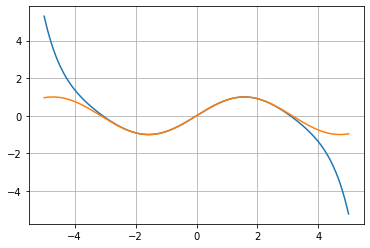

In [2]:
#задание 2.2
import numpy as np
import matplotlib.pyplot as plt


x = np.arange(-5, 5, 0.01)

f_x = x - x**3/6 + x**5/120 - x**7/5040

plt.plot(x, f_x, x, np.sin(x))
plt.grid(True)
plt.show()

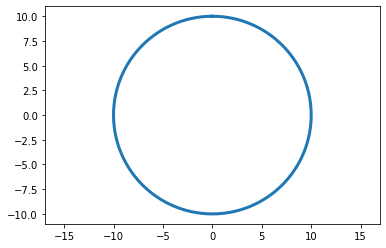

In [3]:
#задание 2.3
import numpy as np
import matplotlib.pyplot as plt


r = 10

t = np.arange(0, 2*np.pi, 0.01)

plt.plot(r*np.sin(t), r*np.cos(t), lw=3)
plt.axis('equal')
plt.show()

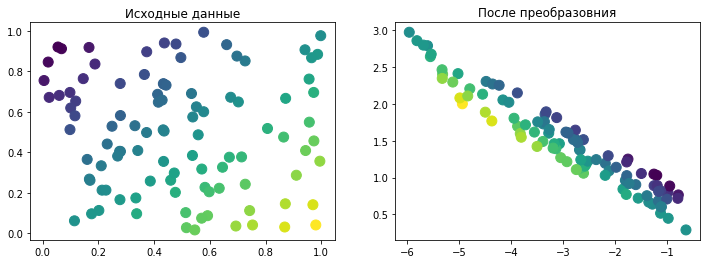

In [47]:
#задание 2.4

import numpy as np
import matplotlib.pyplot as plt
import random

def transformation_plot(plots,matrix):
    fig, ax = plt.subplots(1, 2, figsize=(12,4))
    x = plots[:,0]
    y = plots[:,1]
    
    def set_color(x,y):
        return x-y
    colors = set_color(x,y)
    
    ax[0].scatter(x, y, len(x), c=colors)
    ax[0].set_title('Исходные данные')
    
    plots = np.dot(plots, matrix)
    x = plots[:,0]
    y = plots[:,1]
    
    ax[1].scatter(x, y, len(x), c=colors)
    ax[1].set_title('После преобразовния')
    
number_of_points = 100
plots=np.random.random(size=(number_of_points, 2))
matrix=np.array([[-5,2],[-1,1]])

transformation_plot(plots, matrix)

In [42]:
#задание 2.6

import numpy as np
import matplotlib.pyplot as plt
import random

def calc_angle(v1,v2):
    scalar = np.dot(v1,v2)
    
    # проверка на нулевой вектор (если хотя бы один нулевой,
    # тогда угол между векторами равен 0)
    if np.linalg.norm(v1)*np.linalg.norm(v2) != 0:
        cosA = scalar/(np.linalg.norm(v1)*np.linalg.norm(v2))
        return np.arccos(cosA)
    else:
        return 0;

listV=[]
d=2
V=100
q=[1,1]

listV = np.random.random(size=(V, d))-0.5 #чтобы были вектора с отрицательной координатой
    
count90=0;
count30=0;

for v in listV:
    if calc_angle(q,v)<(np.pi/2):
        count90+=1
    if calc_angle(q,v)<(np.pi/6):
        count30+=1
print('Пропорция  векторов v в V, для которых угол(v,q) < 90 градусов: ', count90/V);
    
print('Пропорция  векторов v в V, для которых угол(v,q) < 30 градусов: ',count30/V);

    
    

Пропорция  векторов v в V, для которых угол(v,q) < 90 градусов:  0.46
Пропорция  векторов v в V, для которых угол(v,q) < 30 градусов:  0.16


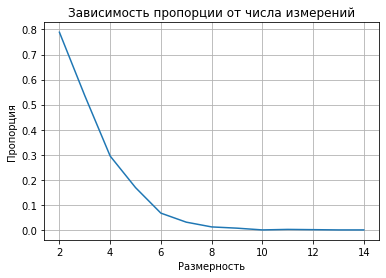

In [92]:
#задание 2.7
import random
def volume_comparison(point_num, r, dmax):#центр окружности в нуле
    compD=[]
    compVal=[]
    for d in range(2,dmax):
        points = np.random.random(size=(1000, d))*r
        square_vol = len(points)
        sphere_vol = 0
        for pt in points:
            if r**2 > sum(x**2 for x in pt):
                sphere_vol +=1 
        
        compD.append(d)
        compVal.append(sphere_vol/square_vol)
        
    return compD,compVal

        
x, y = volume_comparison(1000, 1, 15)        

plt.ylabel('Пропорция')
plt.xlabel('Размерность')
plt.title("Зависимость пропорции от числа измерений")
plt.grid(True)  
plt.plot(x, y)
plt.show()

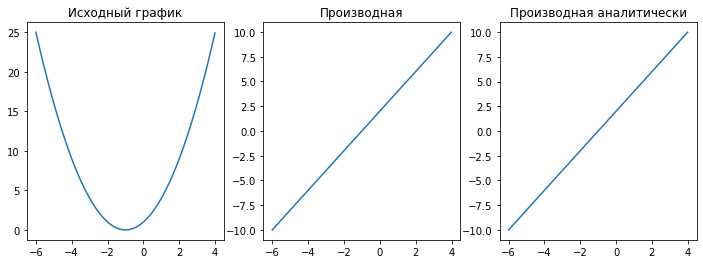

In [32]:
#задание 2.5

a=-6
b=4

x = np.arange(a, b, 0.01)

def func_x(x):
    return x**2+2*x+1

def analytic_derr(x):
    return 2*x + 2

y = func_x(x)
derr_y_analytic = analytic_derr(x)

dx = x[1:] - x[:-1]
dy = y[1:] - y[:-1]

der_x = (x[1:] + x[:-1])/2
der_func = np.divide(dy, dx)


fig, ax = plt.subplots(1, 3, figsize=(12,4))

ax[0].plot(x, y)
ax[0].set_title('Исходный график')
ax[1].plot(der_x, der_func)
ax[1].set_title('Производная')
ax[2].plot(x, derr_y_analytic)
ax[2].set_title('Производная аналитически')

plt.show()

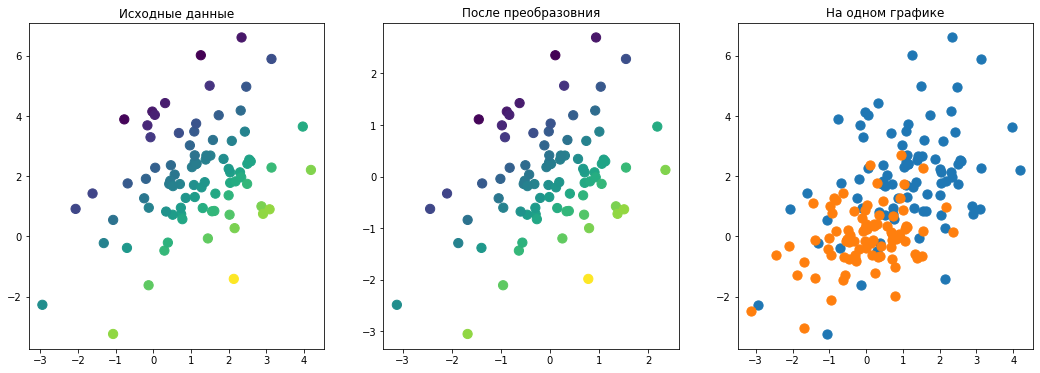

In [56]:
#задание 2.8

def matrix_tranform(m_x, N, d):
    
    m_x=np.transpose(m_x) #чтобы итерироваться по столбцам

    for i in range(0,d):
        mn = np.mean(m_x[i])
        st = np.std(m_x[i], ddof = 1) #по умолачанию std считает /(n-1) , а нужно /n где n - размер выборки
        for j in range(0,N):
            m_x[i][j]=(m_x[i][j]-mn)/st

    m_x=np.transpose(m_x)
    
    return m_x;

N=85
d=2

m_x = np.random.multivariate_normal(mean=[1,2],cov=[[2,1],[1,3]], size=N)

fig, ax = plt.subplots(1, 3, figsize=(18,6))   
    
x = m_x[:,0]
y = m_x[:,1]

def set_color(x,y):
    return x-y
colors = set_color(x,y)

ax[0].scatter(x, y, len(x), c=colors)
ax[0].set_title('Исходные данные')
ax[2].scatter(x, y, len(x))

m_x=matrix_tranform(m_x, N, d)

xn = m_x[:,0]
yn = m_x[:,1]

ax[1].scatter(xn, yn, len(x), c=colors)
ax[1].set_title('После преобразовния')



ax[2].scatter(xn, yn, len(xn))
ax[2].set_title('На одном графике')

plt.show()



Среднее =  -0.04437273427472281 при исходном 0
Дисперсия =  1.0319592318087787 при исходном 1


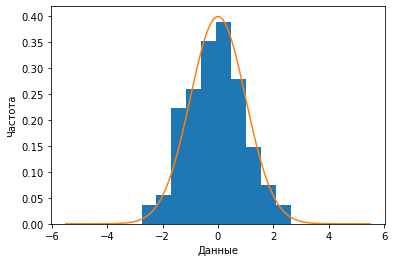

In [98]:
#задание 9 пункт а

import scipy.stats as stats

norm100 = np.random.normal(size=100)

bin_numb = 10 #число интервалов

plt.ylabel('Частота')
plt.xlabel('Данные')

##Правильный расчет количества интервалов(слишком мало значений для его применения)
# q25, q75 = np.percentile(x,[.25,.75])
# bin_width = 2*(q75 - q25)*len(x)**(-1/3)
# bins = round((x.max() - x.min())/bin_width)
# print("Freedman–Diaconis number of bins:", bins)

plt.hist(norm100, density=True, bins = bin_numb)
x = np.linspace(-5.5, 5.5, num=100)
plt.plot(x, stats.norm.pdf(x, 0, 1))

print("Среднее = ",np.mean(norm100),"при исходном 0")
print("Дисперсия = ",np.var(norm100, ddof=0),"при исходном 1")






In [97]:
#задание 9 пункт б

g_dispN = 0;
g_dispN1  = 0;
l_dispN = 0;
l_dispN1 = 0;
mseN = 0;
mseN1 = 0;
Num = 100;

for i in range(0,Num):
    norm20 = np.random.normal(size=20)
    dispN = np.var(norm20,ddof=0)
    dispN1 = np.var(norm20,ddof=1)
    
    if dispN1 > 1: g_dispN1 += 1
    if dispN > 1: g_dispN += 1
    if dispN < 1: l_dispN += 1
    if dispN1 < 1: l_dispN1 += 1
    
    mse += (1-dispN)**2
    mseN1 += (1-dispN1)**2

mse = mse/Num
mseN1 = mseN1/Num

print('Количество раз когда дисперсия превысила реальную: ', g_dispN)
print('Количество раз когда исправленная дисперсия превысила реальную: ', g_dispN1)

print('Количество раз когда дисперсия недооценила реальную: ', l_dispN)
print('Количество раз когда исправленная дисперсия недооценила реальную: ', l_dispN1)

print('Средней квадрат ошибки дисперсии', mse)
print('Средней квадрат ошибки исправленной дисперсии', mseN1)


Количество раз когда дисперсия превысила реальную:  43
Количество раз когда исправленная дисперсия превысила реальную:  49
Количество раз когда дисперсия недооценила реальную:  57
Количество раз когда исправленная дисперсия недооценила реальную:  51
Средней квадрат ошибки дисперсии 0.09970552835197832
Средней квадрат ошибки исправленной дисперсии 0.10730639617834836


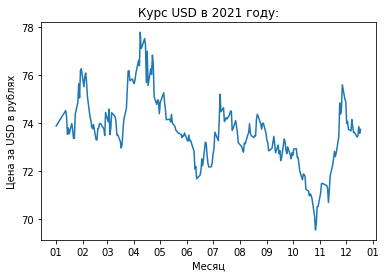

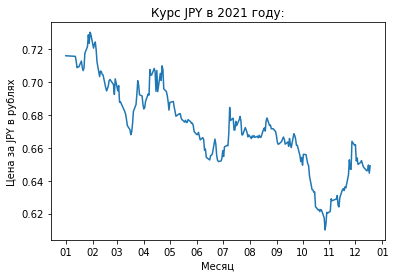

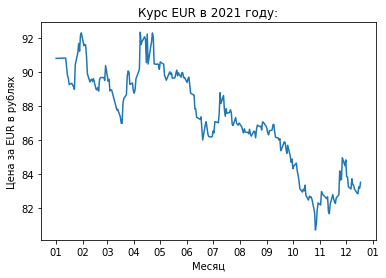

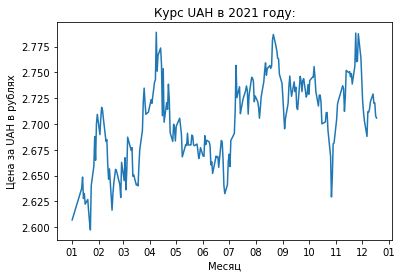

In [105]:
#Часть 1. Задание 2.
import requests
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.dates
from datetime import datetime

def draw_course(name, code):

    date = datetime.now()
    date_year = date.year
    date_month = date.month
    date_day = date.day
    res = requests.get(f"http://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=01/01/{date_year}&date_req2={date_day}/{date_month}/{date_year}&VAL_NM_RQ={code}")

    root = ET.fromstring(res.text)

    values=[[],[]]
    

    
    
    xlist=[]
    ylist=[]
    
    
    
    for child in root:
        values[0].append(child.get('Date'))
        values[1].append(float(child[1].text.replace(',','.'))/float(child[0].text.replace(',','.')))

    for val0 in values[0]:
        date=datetime.strptime(val0, '%d.%m.%Y')
        xlist.append(matplotlib.dates.date2num(date))

    ylist = values[1]
    
    np.savetxt(f'{name}.csv', (ylist,xlist), delimiter=',')#Сохраняет в CSV

    fig, ax = plt.subplots()

    plt.title('Курс '+name+' в '+str(date_year) +' году:')
    plt.ylabel('Цена за '+name+' в рублях')
    plt.xlabel('Месяц');

    ax.xaxis.set_major_locator(matplotlib.dates.DayLocator(1))
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m'))

    ax.plot(xlist, ylist)
    

    
    plt.show()

draw_course("USD", "R01235")
draw_course("JPY", "R01820")
draw_course("EUR", "R01239")
draw_course("UAH", "R01720")


In [21]:
#Часть 1. Задание 1.

import pandas as pd
import numpy as np

counter=0;
df = pd.read_json('sales.json')
df2 = pd.DataFrame(columns=['item', 'country', 'year', 'sales'])

print(df['item']) # получаем коды предметов (код свитера=0)
print()
print(df['sales_by_country'][0]) #получаем словари продаж по странам для этого предмета (выведено для свитера)
print()
print(df['sales_by_country'][0].get('Russia')) #берем продажи конкретной страны (словарь по годам, в данном случае для России)
print()
print(df['sales_by_country'][0].get('Russia').get('2010')) #в конкретный год (2010)
print()

for item in range(0, len(df['item'].keys())): #итерация по кодам предметам
    for country in df['sales_by_country'][item].keys(): #итерация по странам (ключи словаря продаж по странам) 
        for year  in df['sales_by_country'][item].get(f'{country}').keys(): #итерация по годам
            print(f"{df['item'][item]},{country},{year},{df['sales_by_country'][item].get(f'{country}').get(f'{year}')}")
            item_name = df['item'][item] 
            sales_of_item = df['sales_by_country'][item].get(f'{country}').get(f'{year}')
            df2.loc[counter] = [item_name, country, year, sales_of_item]
            counter+=1
            
filename = "CSV_DF2.csv"
f = open(filename, "w+")
f.close()            
df2.to_csv('CSV_DF2.csv',sep=',',columns=['item', 'country', 'year', 'sales'])

df2

0     sweater
1    sneakers
2      hoodie
3       jeans
4     t-shirt
Name: item, dtype: object

{'Russia': {'2010': 85, '2011': 10, '2012': 104, '2013': 59, '2014': 113, '2015': 21, '2016': 23, '2017': 94, '2018': 134, '2019': 152}, 'Belarus': {'2010': 34, '2011': 87, '2012': 91, '2013': 71, '2014': 44, '2015': 61, '2016': 124, '2017': 82, '2018': 33, '2019': 85}, 'Ukraine': {'2010': 53, '2011': 39, '2012': 32, '2013': 102, '2014': 121, '2015': 103, '2016': 100, '2017': 64, '2018': 49, '2019': 143}, 'Lithuania': {'2010': 100, '2011': 34, '2012': 75, '2013': 151, '2014': 26, '2015': 76, '2016': 150, '2017': 21, '2018': 114, '2019': 18}, 'Latvia': {'2010': 70, '2011': 156, '2012': 70, '2013': 39, '2014': 130, '2015': 87, '2016': 36, '2017': 85, '2018': 68, '2019': 33}}

{'2010': 85, '2011': 10, '2012': 104, '2013': 59, '2014': 113, '2015': 21, '2016': 23, '2017': 94, '2018': 134, '2019': 152}

85

sweater,Russia,2010,85
sweater,Russia,2011,10
sweater,Russia,2012,104
sweater,Russia,2013,

,item,country,year,sales
0,sweater,Russia,2010,85
1,sweater,Russia,2011,10
2,sweater,Russia,2012,104
3,sweater,Russia,2013,59
4,sweater,Russia,2014,113
...,...,...,...,...
245,t-shirt,Latvia,2015,138
246,t-shirt,Latvia,2016,100
247,t-shirt,Latvia,2017,37
248,t-shirt,Latvia,2018,59


In [94]:
#Часть 3. Задание 2.
import numpy as np
import networkx as nx

counter = 0;

vk = nx.read_gml('VK.gml')
len_counter = [0]*7

print("Количество уникальных пользователей равно: ", len(vk.nodes))

friends = {}
fr_val = []
for n in vk.nodes: 
    friends[n]=0

for e in vk.edges:
    friends[e[0]]+=1
    friends[e[1]]+=1
    
sorted_friends = sorted(friends.items(), key=lambda x: x[1], reverse=True)

print("Пользователи с наибольшим количеством друзей:")

for pair in sorted_friends[:15]:
    counter+=1
    print("   ",counter," Пользователь id ", pair[0], " c количеством друзей: ", pair[1])
    
for pair in sorted_friends:
    fr_val.append(pair[1])
    
print('Медианное число друзей:  ', np.median(fr_val))
print('Среднее число друзей: ', np.mean(fr_val))

shortest_path = nx.all_pairs_shortest_path_length(vk)

for pair in shortest_path:
    for ln in pair[1].values():
        if ln>=1 and ln<=6:
            len_counter[ln]+=1
        else:
            len_counter[0]+=1

total_ln=len(vk.nodes)**2            

for i in range(1,7):
    print(f'Доля пар с L={i} {round(len_counter[i]/total_ln, 2)}')          
print(f'Доля несвязанных пар или пар с L>6 или {round(len_counter[0]/total_ln, 3)}')   

Количество уникальных пользователей равно:  3766
Пользователи с наибольшим количеством друзей:
    1  Пользователь id  154572605  c количеством друзей:  351
    2  Пользователь id  136435809  c количеством друзей:  211
    3  Пользователь id  34847138  c количеством друзей:  210
    4  Пользователь id  1997236  c количеством друзей:  178
    5  Пользователь id  472893795  c количеством друзей:  178
    6  Пользователь id  270418723  c количеством друзей:  167
    7  Пользователь id  246825563  c количеством друзей:  155
    8  Пользователь id  120109289  c количеством друзей:  148
    9  Пользователь id  83372852  c количеством друзей:  146
    10  Пользователь id  94780691  c количеством друзей:  140
    11  Пользователь id  63962118  c количеством друзей:  136
    12  Пользователь id  150491520  c количеством друзей:  135
    13  Пользователь id  94509311  c количеством друзей:  135
    14  Пользователь id  122784747  c количеством друзей:  132
    15  Пользователь id  41459412  c ко